In [3]:
import numpy as np
import matplotlib.pyplot as plt 

# Sirenje spektralnih linija 

## Vezbica za AST1 letnji. 

## Ovo cemo sve okaciti na github na kraju da ostane dostupno za vijek i vijekova 


Prvi cilj je da se igramo apsorpcionim profilom linije. 

Pretpostavili smo da je u pitanju jedan Gausijan koji izgleda ovako:

$\phi_\lambda = \frac{1}{\sqrt{\pi} \Delta\lambda_D} e ^{-(\frac{\lambda - \lambda_0}{\Delta\lambda_D})^2}$ 

In [15]:
# Sta sve ulazi u ovu funkciju:
# Lambda_0 centralna talasna duzina 
# Doplerova talasna duzina (delta lambda D)
# Ovo su neki brojevi: 

lambda_0 = 656.28 # radicemo u nm. Kada budemo koristili
# formule, moramo voditi racuna o jedinicama

delta_lambda_d = 0.2 # ovo smo za sada lupili 

#llambda = np.linspace(655.0,657.0,1001) # ajmo malo lepse

llambda = np.linspace(-1.0,1.0,1001) + lambda_0

In [17]:
print (llambda)

[655.28  655.282 655.284 ... 657.276 657.278 657.28 ]


$\phi_\lambda = \frac{1}{\sqrt{\pi} \Delta\lambda_D} e ^{-(\frac{\lambda - \lambda_0}{\Delta\lambda_D})^2}$ 

In [6]:
# definisacemo funkciju gaus_prof,
# koja racuna gausovski profil:

def gaus_prof(llambda,lambda_0,delta_lambda_d):
    
    eksponent = ((llambda - lambda_0)/delta_lambda_d)**2.0
    
    profil = 1./np.sqrt(np.pi) / delta_lambda_d * np.exp(-eksponent)
    
    return profil

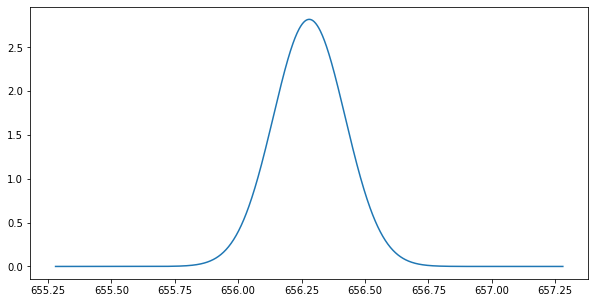

In [16]:
plt.figure(figsize=[10,5])
plt.plot(llambda,gaus_prof(llambda,lambda_0,delta_lambda_d))

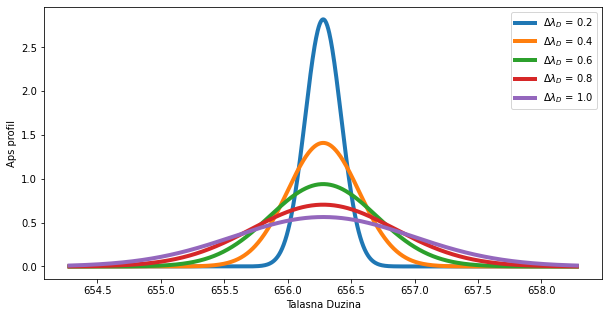

In [24]:
llambda = np.linspace(-2.0,2.0,1001) + lambda_0

plt.figure(figsize=[10,5])

for i in range (0,5):
    
    delta_lambda_d = 0.2 + i*0.2
    
    trenutni_profil = gaus_prof(llambda, lambda_0, delta_lambda_d)
    plt.plot(llambda, trenutni_profil, linewidth = 4.0, \
            label = '$\Delta\lambda_D$ = ' + str(delta_lambda_d)[:3])
    plt.xlabel("Talasna Duzina")
    plt.ylabel("Aps profil")
    plt.legend()

## Plan: 

1) Napravi model za spektar 

2) Nadji neke podatke (to ce nam dati Ivan) 

3) Nafituj model na podatke (to cemo svi zajedno, necemo spavati nocas)

4) Probaj da zakljucis nesto iz podataka - izvedi Temperaturu 
   iz doplerove polusirine (delta_lambda_d)
   
5) Chicha-Micha i gotova pricha

# Prvo pravimo model! 

In [27]:
# Profil vec imamo. Trebaju nam jos dva parametra: 

# tau - ukupna opticka dubina linije - to ce biti neki slobodan parametar
# I_lambda^0 - ulazni intenzitet - u principu moze nesto da nam kaze
# Prethodna dva parametra, lambda_0 i delta_lambda_d su vec definisani gore

def spektar(llambda_u, lambda_0_u, delta_lambda_d_u, tau_u, I_0_u):
    
    phi_lambda_u = gaus_prof(llambda_u, lambda_0_u, delta_lambda_d_u)
    
    I_lambda_u = I_0_u * np.exp(- tau_u * phi_lambda_u)
    
    return I_lambda_u

In [26]:
# Hajde neki primer: 
lambda_0 = 656.28 # (pazite radimo u nm)
delta_lambda_d = 0.2
llambda = np.linspace(-1.0,1.0,1001) + lambda_0
tau = 5.0
I_0 = 1.0

In [28]:
I_lambda = spektar(llambda, lambda_0, delta_lambda_d, tau, I_0)

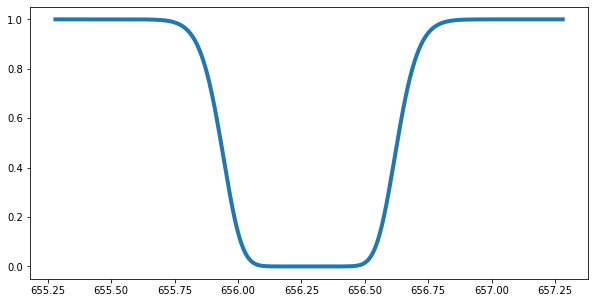

In [34]:
plt.figure(figsize=[10,5])
plt.plot(llambda, I_lambda, linewidth=4.0)
#plt.plot(llambda, tau * gaus_prof(llambda, lambda_0, delta_lambda_d), \
        #linewidth = 4.0)

In [35]:
# ovo izgleda blago nerealno, hajde da promenimo tau: 

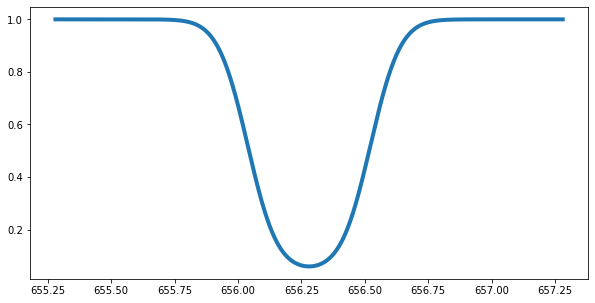

In [36]:
tau = 1.0
I_lambda = spektar(llambda, lambda_0, delta_lambda_d, tau, I_0)
plt.figure(figsize=[10,5])
plt.plot(llambda, I_lambda, linewidth=4.0)

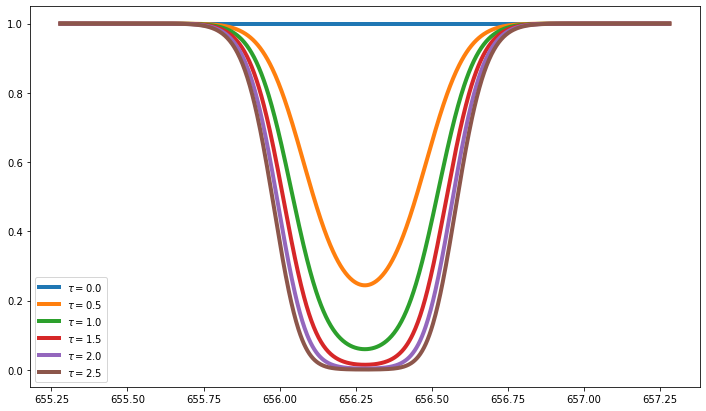

In [38]:
# Hajmo sada za razlicite vrednosti tau 
# Cilj je da vidimo da li to sve: a) ima smisla ; b) lepo radi

plt.figure(figsize=[12,7])
for i in range(0,6):
    
    tau = i*0.5
    I_lambda = spektar(llambda, lambda_0, delta_lambda_d, tau, I_0)
    plt.plot(llambda, I_lambda, linewidth=4.0,label='$\\tau =$'+\
            str(tau)[:3])
    
    plt.legend()
    
    

# A sada, fitovanje! 

## zajedno cemo napraviti test podatke (znamo tacan odgovor), i dizajnirati metod za fitovanje. 

## A vi cete posle sami isprobati na podacima

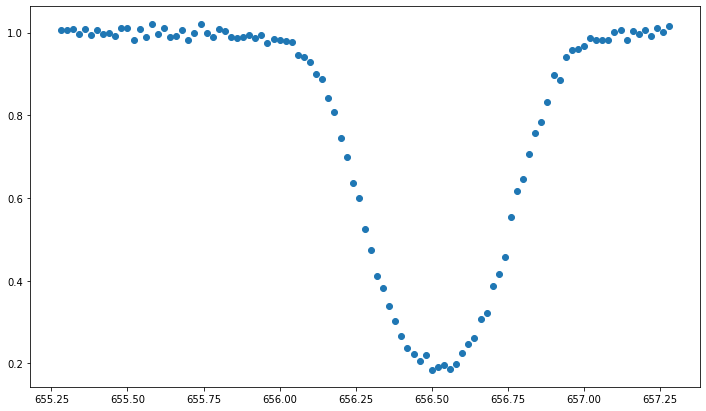

In [44]:
## Test model: 

lambda_0_t = 656.52
delta_lambda_d_t = 0.24
tau_t = 0.72
I_0_t = 1.0

llambda = np.linspace(-1.0,1.0,101) + lambda_0

lazni_podaci = spektar(llambda, lambda_0_t, delta_lambda_d_t, tau_t, I_0_t)

# dodaj shum:

lazni_podaci += np.random.normal(0,0.01,101)

plt.figure(figsize=[12,7])
plt.plot(llambda, lazni_podaci, 'o')

## Pravimo se da ne znamo tacan odgovor i hocemo da nafitujemo! Boom! 

In [45]:
from scipy.optimize import curve_fit

In [52]:
parametri, kovarijanse = curve_fit(spektar, llambda, lazni_podaci,\
                      p0 = [656.28, 0.2, 1.0, 1.2])

In [53]:
print(parametri)

[6.56519317e+02 2.39790785e-01 7.19980926e-01 1.00021256e+00]


In [55]:
print ("Lambda_0 = ", parametri[0], 'original = ', lambda_0_t)
print ("delta_lambda_d = ", parametri[1], 'original = ', delta_lambda_d_t)
print ("tau = ", parametri[2], 'original = ', tau_t)
print ("I_0 = ", parametri[3], 'original = ', I_0_t)

Lambda_0 =  656.5193173234308 original =  656.52
delta_lambda_d =  0.2397907852429004 original =  0.24
tau =  0.7199809260492432 original =  0.72
I_0 =  1.0002125591373463 original =  1.0


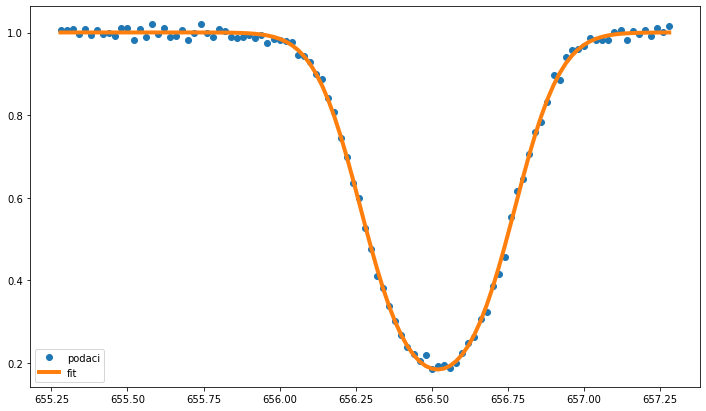

In [58]:
plt.figure(figsize=[12,7])
plt.plot(llambda, lazni_podaci, 'o', label='podaci')
plt.plot(llambda, spektar(llambda, parametri[0], parametri[1], \
                         parametri[2], parametri[3]), label = 'fit', \
        linewidth =4.0)
plt.legend()